In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### Basic Tutorial

In [25]:
data = train.as_matrix()
xtrain=data[0:21000,1:]
train_label=data[0:21000,0]

/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [27]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

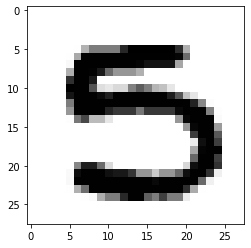

In [36]:
xtest=data[21000:,1:]
actual_label=data[21000:,0]

d=xtest[1]
d.shape=(28,28)
plt.imshow(255-d, cmap='gray')

In [37]:
clf.predict([xtest[1]])

array([3])

In [39]:
p=clf.predict(xtest)
count=0
for i in range(0,21000):
    count+=1 if p[i]==actual_label[i] else 0
print('accuracy=', (count/21000)*100)

accuracy= 83.35238095238095


### Tensorflow

(28, 28)


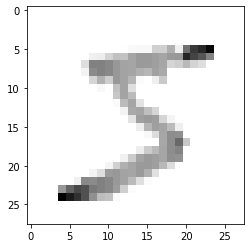

In [53]:
print(x_train[0].shape)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [56]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scale values between 0 and 1, makes it easier for the model to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2538 - accuracy: 0.9245
Epoch 2/4
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1076 - accuracy: 0.9665
Epoch 3/4
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0750 - accuracy: 0.9760
Epoch 4/4
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0557 - accuracy: 0.9820


In [57]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0867 - accuracy: 0.9764
0.08674780590219888 0.9764


In [59]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [60]:
model.save('number_reader.model')
new_model = tf.keras.models.load_model('number_reader.model')

predictions = new_model.predict([x_test])

print(np.argmax(predictions[0]))

INFO:tensorflow:Assets written to: number_reader.model/assets


AttributeError: 'list' object has no attribute 'shape'

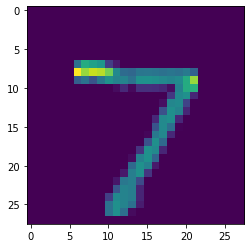

In [61]:
plt.imshow(x_test[0])